### Human Activity Recognition 
#### Udacity Machine Learning Nanodegree, Capstone Project
#### Glenn Mossy 11/24/2019

The data we will be using is the Human Activity Recognition dataset from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

Version 2 of the dataset:
http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import time
# print(os.listdir('./data/UCI HAR Dataset'))
print(os.listdir('./data/HAPT Data Set'))

### Collect Dataset and Explore

In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
#from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
# 'train/X_train.txt': Training set
X_train = pd.read_csv('./data/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
#'test/X_test.txt': Test set.
X_test = pd.read_csv('./data/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)
#'train/y_train.txt': Training labels
y_train = pd.read_csv('./data/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names='Y')
#'test/X_test.txt': Test set.
y_test = pd.read_csv('./data/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names='Y')

train_dataset = pd.read_csv('./data/kaggle-dataset/train.csv', sep=',')
test_dataset = pd.read_csv('./data/kaggle-dataset/test.csv', sep=',')

# combine the train/test data
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# print(X.shape)
# print(y.shape)

# 'features.txt': List of all features.
features = pd.read_csv('./data/UCI HAR Dataset/features.txt', sep=' ', header=None, names=('ID','Sensor'))

#'features_info.txt': Shows information about the variables used on the feature vector.
features_info = pd.read_csv('./data/UCI HAR Dataset/features_info.txt', sep=' ', header=None, names=('ID','Sensor'))

# map the header row to identify the column parameter name
X_train.columns = features['Sensor']
X_test.columns = features['Sensor']

# 'activity_labels.txt': Links the class labels with their activity name.
activity_labels = pd.read_csv('./data/UCI HAR Dataset/activity_labels.txt', sep=' ', header=None, names=('ID','Activity'))

# The following files are available for the train and test data. Their descriptions are equivalent.
# - 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 
# - 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 
# - 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 
# - 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

subject_train = pd.read_csv('./data/UCI HAR Dataset/train/subject_train.txt', sep='\s+', header=None)
# Inertial Signals
total_acc_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', sep='\s+', header=None)
body_acc_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
body_gyro_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', sep='\s+', header=None)

INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
#y_train.describe()
#body_acc_x_train.describe()

In [56]:
#  Smartphone-Based Recognition of Human Activities and Postural Transitions Data Set
#  Activity recognition data set built from the recordings of 30 subjects performing basic activities and postural transitions while carrying a waist-mounted smartphone with embedded inertial sensors.
# http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions
# Updated Version of the dataset that adds postural transitions
# http://archive.ics.uci.edu/ml/machine-learning-databases/00341/ in a folder callled "HAPT Data Set"
# './data/HAPT Data Set/Train/subject_id_train.txt'
# './data/HAPT Data Set/Train/X_train.txt'
# './data/HAPT Data Set/Train/y_train.txt'
# './data/HAPT Data Set/activity_labels'
# './data/HAPT Data Set/features'
# './data/HAPT Data Set/activity_labels'
# './data/HAPT Data Set/features_info'

# The Training set
X_train2 = pd.read_csv('./data/HAPT Data Set/Train/X_train.txt', sep='\s+', header=None)
# The Training labels
y_train2 = pd.read_csv('./data/HAPT Data Set/Train/y_train.txt', sep='\s+', header=None, names='Y')
# y_train2 = pd.read_csv('./data/HAPT Data Set/Train/y_train.txt', sep='\s+', header=None, names='Activity')
# The Test set.
X_test2 = pd.read_csv('./data/HAPT Data Set/Test/X_test.txt', sep='\s+', header=None)
# The Test set labels
y_test2 = pd.read_csv('./data/HAPT Data Set/Test/y_test.txt', sep='\s+', header=None, names='Y')

#  Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 
subject_train2 = pd.read_csv('./data/HAPT Data Set/Train/subject_id_train.txt', sep='\s+', header=None)

# Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 
subject_test2 = pd.read_csv('./data/HAPT Data Set/Test/subject_id_test.txt', sep='\s+', header=None)

# 'features.txt': List of all features.
features2 = pd.read_csv('./data/HAPT Data Set/features.txt', header=None)

#'features_info.txt': Shows information about the variables used on the feature vector.

# 'activity_labels.txt': Links the class labels with their activity name.
activity_labels2 = pd.read_csv('./data/HAPT Data Set/activity_labels.txt', sep='\s+', names=('ID', 'Activity'), header=None)

# map the header row to identify the column parameter name
# X_train2.columns = features2['Sensor']
# X_test2.columns = features2['Sensor']

# combine the train/test data
X = pd.concat([X_train2, X_test2])
y = pd.concat([y_train2, y_test2])

# print(X.shape)
# print(y.shape)

# The following files are available for the train and test data. Their descriptions are equivalent.
# - 'train/subject_train.txt': Each row identifies the subject who performed the activity for each window sample. Its range is from 1 to 30. 
# - 'train/Inertial Signals/total_acc_x_train.txt': The acceleration signal from the smartphone accelerometer X axis in standard gravity units 'g'. Every row shows a 128 element vector. The same description applies for the 'total_acc_x_train.txt' and 'total_acc_z_train.txt' files for the Y and Z axis. 
# - 'train/Inertial Signals/body_acc_x_train.txt': The body acceleration signal obtained by subtracting the gravity from the total acceleration. 
# - 'train/Inertial Signals/body_gyro_x_train.txt': The angular velocity vector measured by the gyroscope for each window sample. The units are radians/second. 

subject_train = pd.read_csv('./data/UCI HAR Dataset/train/subject_train.txt', sep='\s+', header=None)
# Inertial Signals
total_acc_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', sep='\s+', header=None)
body_acc_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
body_gyro_x_train = pd.read_csv('./data/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', sep='\s+', header=None)

INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
#y_train.describe()
#body_acc_x_train.describe(

In [80]:
features2.describe

<bound method NDFrame.describe of                                    0
0    tBodyAcc-Mean-1                
1    tBodyAcc-Mean-2                
2    tBodyAcc-Mean-3                
3    tBodyAcc-STD-1                 
4    tBodyAcc-STD-2                 
..                               ...
556  tBodyGyro-AngleWRTGravity-1    
557  tBodyGyroJerk-AngleWRTGravity-1
558  tXAxisAcc-AngleWRTGravity-1    
559  tYAxisAcc-AngleWRTGravity-1    
560  tZAxisAcc-AngleWRTGravity-1    

[561 rows x 1 columns]>

In [49]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [ ]:
X_train2.info()

In [53]:
X_train2.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


In [78]:
# look at data as numpy array
X_train2.values

array([[ 0.04357967, -0.00597022, -0.03505434, ..., -0.84155851,
         0.17991281, -0.05171842],
       [ 0.03948004, -0.00213128, -0.02906736, ..., -0.8450924 ,
         0.18026111, -0.04743634],
       [ 0.03997778, -0.00515272, -0.02265071, ..., -0.84923013,
         0.18060956, -0.04227136],
       ...,
       [ 0.03745094, -0.00272442,  0.02100941, ..., -0.77956634,
         0.24912145,  0.04707077],
       [ 0.04401105, -0.00453578, -0.0512422 , ..., -0.78560327,
         0.24640867,  0.03170003],
       [ 0.06895376,  0.00181032, -0.08032343, ..., -0.78369253,
         0.24678499,  0.04298129]])

In [57]:
activity_labels2

,ID,Activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
6,7,STAND_TO_SIT
7,8,SIT_TO_STAND
8,9,SIT_TO_LIE
9,10,LIE_TO_SIT


In [54]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 13.5 MB


In [ ]:
# Check for null values
print(X_train2.isnull().values.any(), "training dataset null values")
print(X_test2.isnull().values.any(), "testing dataset null values")

In [62]:

df=pd.DataFrame(y_train2.Y)
df.T

,0,1,2,3,4,5,6,7,8,9,...,7757,7758,7759,7760,7761,7762,7763,7764,7765,7766
Y,5,5,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2


In [71]:
labeled_y_train2 = df.replace({0: activity_labels2.Activity[0], 1: activity_labels2.Activity[1],2: activity_labels2.Activity[2], 3: activity_labels2.Activity[3], 4: activity_labels2.Activity[4], 5: activity_labels2.Activity[5], 6: activity_labels2.Activity[6], 7: activity_labels2.Activity[7], 8: activity_labels2.Activity[8], 9: activity_labels2.Activity[9], 10: activity_labels2.Activity[10], 11: activity_labels2.Activity[11] })

In [74]:
dflyt=pd.DataFrame(labeled_y_train2)
dflyt.T

,0,1,2,3,4,5,6,7,8,9,...,7757,7758,7759,7760,7761,7762,7763,7764,7765,7766
Y,LAYING,LAYING,LAYING,LAYING,LAYING,LAYING,LAYING,LAYING,LAYING,LAYING,...,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS,WALKING_DOWNSTAIRS


In [79]:
# look at data as numpy array
dflyt.values

array([['LAYING'],
       ['LAYING'],
       ['LAYING'],
       ...,
       ['WALKING_DOWNSTAIRS'],
       ['WALKING_DOWNSTAIRS'],
       ['WALKING_DOWNSTAIRS']], dtype=object)

In [44]:
df=pd.DataFrame(subject_train2)
df.T

,0,1,2,3,4,5,6,7,8,9,...,7757,7758,7759,7760,7761,7762,7763,7764,7765,7766
0,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30


In [41]:
# https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
df=pd.DataFrame(features2)

In [42]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1


In [15]:
# https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
activity_labels2.Activity

0                WALKING
1       WALKING_UPSTAIRS
2     WALKING_DOWNSTAIRS
3                SITTING
4               STANDING
5                 LAYING
6           STAND_TO_SIT
7           SIT_TO_STAND
8             SIT_TO_LIE
9             LIE_TO_SIT
10          STAND_TO_LIE
11          LIE_TO_STAND
Name: Activity, dtype: object

In [16]:
activity_labels2.Activity[5]

'LAYING'

In [17]:
dfal=pd.DataFrame(activity_labels2)
# dfal=pd.DataFrame(activity_labels2.Activity)
dfal.T

,0,1,2,3,4,5,6,7,8,9,10,11
ID,1,2,3,4,5,6,7,8,9,10,11,12
Activity,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING,STAND_TO_SIT,SIT_TO_STAND,SIT_TO_LIE,LIE_TO_SIT,STAND_TO_LIE,LIE_TO_STAND


In [18]:
print('Train labels', activity_labels2['Activity'], y_train2["Y"])

Train labels 0                WALKING
1       WALKING_UPSTAIRS
2     WALKING_DOWNSTAIRS
3                SITTING
4               STANDING
5                 LAYING
6           STAND_TO_SIT
7           SIT_TO_STAND
8             SIT_TO_LIE
9             LIE_TO_SIT
10          STAND_TO_LIE
11          LIE_TO_STAND
Name: Activity, dtype: object 0       5
1       5
2       5
3       5
4       5
       ..
7762    2
7763    2
7764    2
7765    2
7766    2
Name: Y, Length: 7767, dtype: int64


In [19]:
df = train_dataset
test = test_dataset

In [20]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7342,7343,7344,7345,7346,7347,7348,7349,7350,7351
tBodyAcc-mean()-X,0.288585,0.278419,0.279653,0.279174,0.276629,0.277199,0.279454,0.277432,0.277293,0.280586,...,0.276137,0.29423,0.221206,0.207861,0.237966,0.299665,0.273853,0.273387,0.289654,0.351503
tBodyAcc-mean()-Y,-0.0202942,-0.0164106,-0.0194672,-0.0262006,-0.0165697,-0.0100979,-0.0196408,-0.0304883,-0.0217507,-0.0099603,...,-0.108046,-0.0399683,-0.0363901,0.0634229,-0.00108781,-0.0571934,-0.00774933,-0.0170106,-0.018843,-0.0124231
tBodyAcc-mean()-Z,-0.132905,-0.12352,-0.113462,-0.123283,-0.115362,-0.105137,-0.110022,-0.12536,-0.120751,-0.106065,...,-0.056677,-0.143397,-0.167651,-0.220567,-0.148326,-0.181233,-0.147468,-0.0450218,-0.158281,-0.203867
tBodyAcc-std()-X,-0.995279,-0.998245,-0.99538,-0.996091,-0.998139,-0.997335,-0.996921,-0.996559,-0.997328,-0.994803,...,-0.230796,-0.230396,-0.176954,-0.244758,-0.218949,-0.195387,-0.235309,-0.218218,-0.219139,-0.26927
tBodyAcc-std()-Y,-0.983111,-0.9753,-0.967187,-0.983403,-0.980817,-0.990487,-0.967186,-0.966728,-0.961245,-0.972758,...,-0.140521,-0.133669,-0.0501467,-0.0321591,-0.0129267,0.0399048,0.00481628,-0.103822,-0.111412,-0.0872115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(X,gravityMean)",-0.841247,-0.844788,-0.848933,-0.848649,-0.847865,-0.849632,-0.85215,-0.851017,-0.847971,-0.848294,...,-0.830575,-0.799426,-0.787935,-0.780362,-0.797272,-0.791883,-0.77184,-0.779133,-0.785181,-0.783267
"angle(Y,gravityMean)",0.179941,0.180289,0.180637,0.181935,0.185151,0.184823,0.18217,0.183779,0.188982,0.19031,...,0.213174,0.23549,0.24449,0.249624,0.234996,0.238604,0.252676,0.249145,0.246432,0.246809
"angle(Z,gravityMean)",-0.0586269,-0.0543167,-0.0491178,-0.0476632,-0.0438923,-0.0421264,-0.04301,-0.0419758,-0.0373639,-0.0344173,...,-0.00510524,-0.00164732,0.00953791,0.0278779,0.048907,0.0498191,0.0500526,0.0408112,0.0253395,0.0366948
subject,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,30


In [21]:
print ('The training set has {} examples'.format(len(X_train2)))
print ('The testing set has  {} examples'.format(len(X_test2)))
print ('')
print ('The percentage of test to total examples is {:.2f}%'.format(len(X_test2) / float(len(X_test2) + len(X_train2)) * 100))

The training set has 7767 examples
The testing set has  3162 examples

The percentage of test to total examples is 28.93%


In [22]:
df = X_train2
test = X_test2

In [23]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7757,7758,7759,7760,7761,7762,7763,7764,7765,7766
0,0.043580,0.039480,0.039978,0.039785,0.038758,0.038988,0.039897,0.039082,0.039026,0.040354,...,0.038560,0.045856,0.016407,0.011025,0.023166,0.048048,0.037639,0.037451,0.044011,0.068954
1,-0.005970,-0.002131,-0.005153,-0.011809,-0.002289,0.004109,-0.005324,-0.016047,-0.007410,0.004245,...,-0.092713,-0.025418,-0.021881,0.076784,0.013015,-0.042445,0.006430,-0.002724,-0.004536,0.001810
2,-0.035054,-0.029067,-0.022651,-0.028916,-0.023863,-0.017340,-0.020457,-0.030241,-0.027301,-0.017932,...,0.013574,-0.041747,-0.057220,-0.090977,-0.044892,-0.065884,-0.044345,0.021009,-0.051242,-0.080323
3,-0.995381,-0.998348,-0.995482,-0.996194,-0.998241,-0.997438,-0.997024,-0.996662,-0.997431,-0.994906,...,-0.230859,-0.230459,-0.177014,-0.244822,-0.219011,-0.195448,-0.235372,-0.218281,-0.219202,-0.269336
4,-0.988366,-0.982945,-0.977314,-0.988569,-0.986774,-0.993485,-0.977313,-0.976996,-0.973190,-0.981181,...,-0.403554,-0.398798,-0.340828,-0.328343,-0.314995,-0.278326,-0.302680,-0.378082,-0.383350,-0.366553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,-0.464761,-0.732626,0.100699,0.640011,0.693578,0.275041,0.014637,-0.561871,-0.234313,-0.482871,...,0.918171,0.885558,-0.546757,-0.864127,-0.774783,0.206972,-0.879033,0.864404,0.936674,-0.056088
557,-0.018446,0.703511,0.808529,-0.485366,-0.615971,-0.368224,-0.189512,0.467383,0.117797,-0.070670,...,-0.609025,-0.879032,-0.950493,0.591409,0.730142,-0.425619,0.400219,0.701169,-0.589479,-0.616956
558,-0.841559,-0.845092,-0.849230,-0.848947,-0.848164,-0.849927,-0.852441,-0.851309,-0.848270,-0.848592,...,-0.830908,-0.799820,-0.788351,-0.780793,-0.797670,-0.792292,-0.772288,-0.779566,-0.785603,-0.783693
559,0.179913,0.180261,0.180610,0.181907,0.185124,0.184795,0.182142,0.183751,0.188955,0.190283,...,0.213148,0.235465,0.244466,0.249600,0.234971,0.238580,0.252653,0.249121,0.246409,0.246785


In [24]:
y_train2.columns

Index(['Y'], dtype='object')

In [25]:
# https://github.com/deadskull7/Human-Activity-Recognition-with-Neural-Network-using-Gyroscopic-and-Accelerometer-variables/blob/master/Human%20Activity%20Recognition%20(97.98%20%25).ipynb

# sns.set(rc={'figure.figsize':(15,5)})
# fig1 = sns.stripplot(x='Activity', y= df.loc[df['subject']==15].iloc[:,7], data= df.loc[df['subject']==15], jitter=True)
# plt.title("Feature Distribution")
# plt.grid(True)
# plt.show(fig1)

----------------------------------------
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


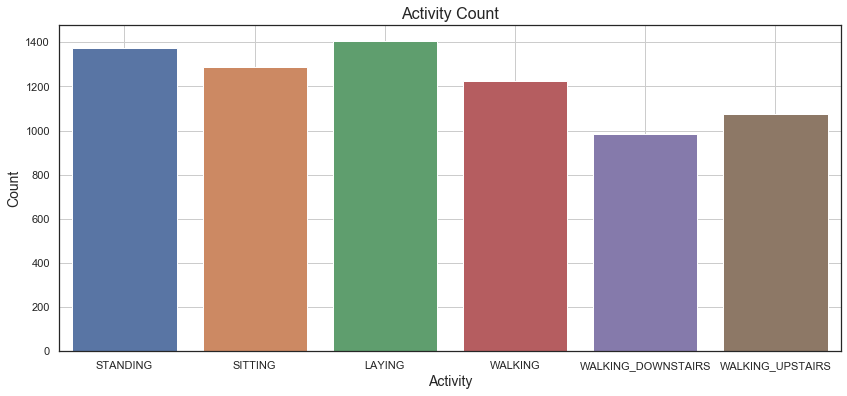

In [26]:
df = train_dataset
test = test_dataset
df.T
# print(df.Activity.unique())
print("----------------------------------------")
print(df.Activity.value_counts())

sns.set(rc={'figure.figsize':(14,6)})
sns.set_style('white')
fig = sns.countplot(x = "Activity" , data = df)
plt.xlabel("Activity", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Activity Count", fontsize=16)
plt.grid(True)
plt.show(fig)

----------------------------------------


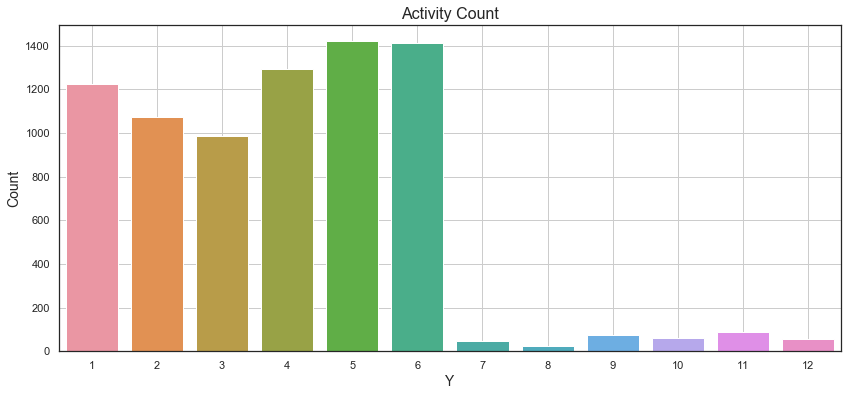

In [27]:
df = y_train2

df.T
# print(df.Y.unique())
print("----------------------------------------")
# print(df.Y.value_counts())
# can be referenced as y_train2['Y'].value_counts()

sns.set(rc={'figure.figsize':(14,6)})
sns.set_style('white')
fig = sns.countplot(x = "Y" , data = y_train2)
plt.xlabel("Y", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Activity Count", fontsize=16)
plt.grid(True)
plt.show(fig)

In [28]:
variables = ['fBodyAcc-Mean-1', 'fBodyAcc-Mean-2', 'fBodyAcc-Mean-3']

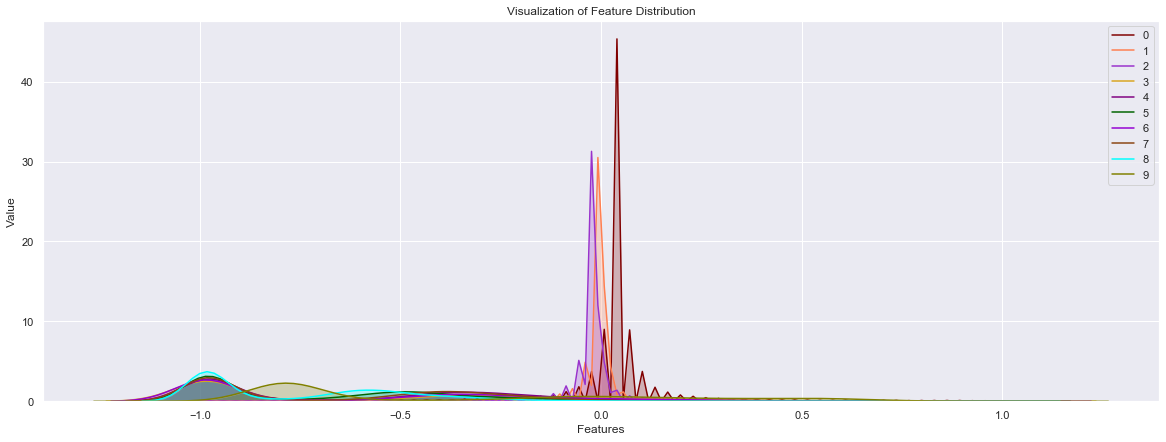

In [29]:
df = X_train2

# https://github.com/deadskull7/Human-Activity-Recognition-with-Neural-Network-using-Gyroscopic-and-Accelerometer-variables/blob/master/Human%20Activity%20Recognition%20(97.98%20%25).ipynb
sns.set(rc={'figure.figsize':(20,7)})
colours = ["maroon","coral","darkorchid","goldenrod","purple","darkgreen","darkviolet","saddlebrown","aqua","olive"]
index = -1
for i in df.columns[0:10]:
    index = index + 1
    fig = sns.kdeplot(df[i] , shade=True, color=colours[index])
plt.xlabel("Features")
plt.ylabel("Value")
plt.title("Visualization of Feature Distribution")
plt.grid(True)
plt.show(fig)

In [30]:
X_train2.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [31]:
y_train2['Y'].value_counts()

5     1423
6     1413
4     1293
1     1226
2     1073
3      987
11      90
9       75
10      60
12      57
7       47
8       23
Name: Y, dtype: int64

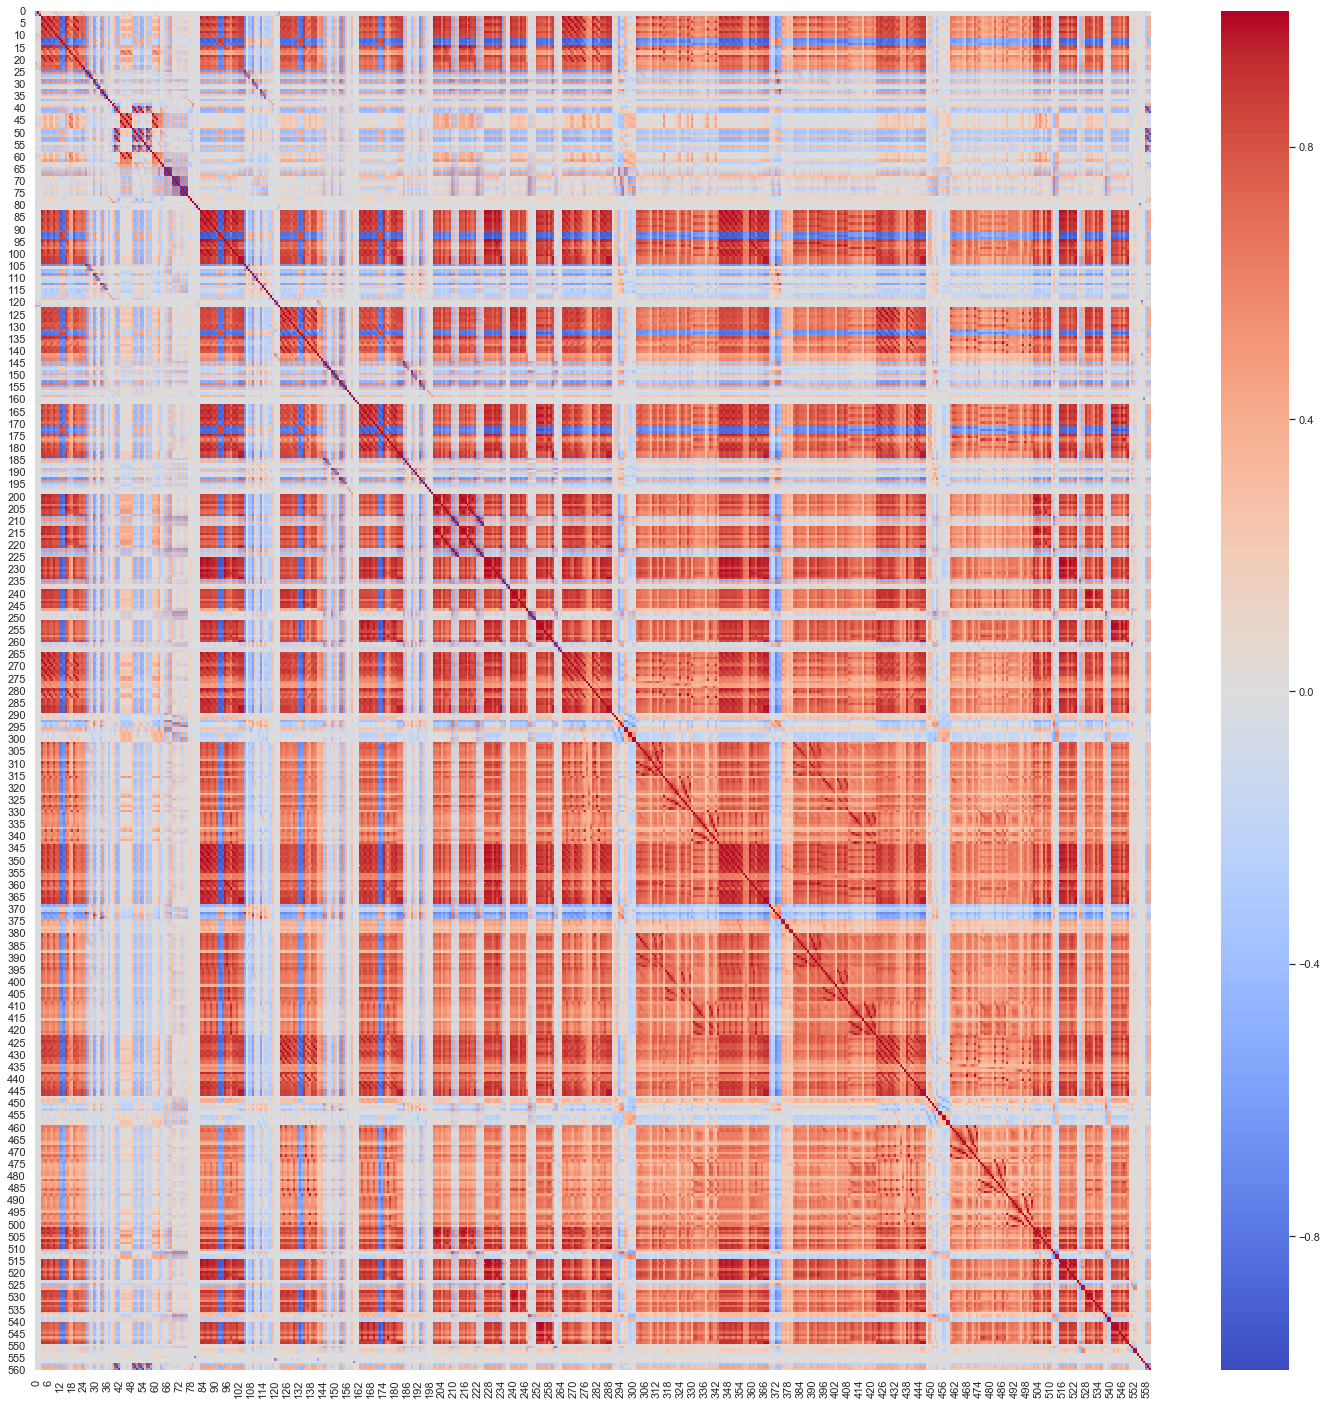

In [32]:
# look at the data through a correlation matrix
correlations = X_train2.corr()
#plot on a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

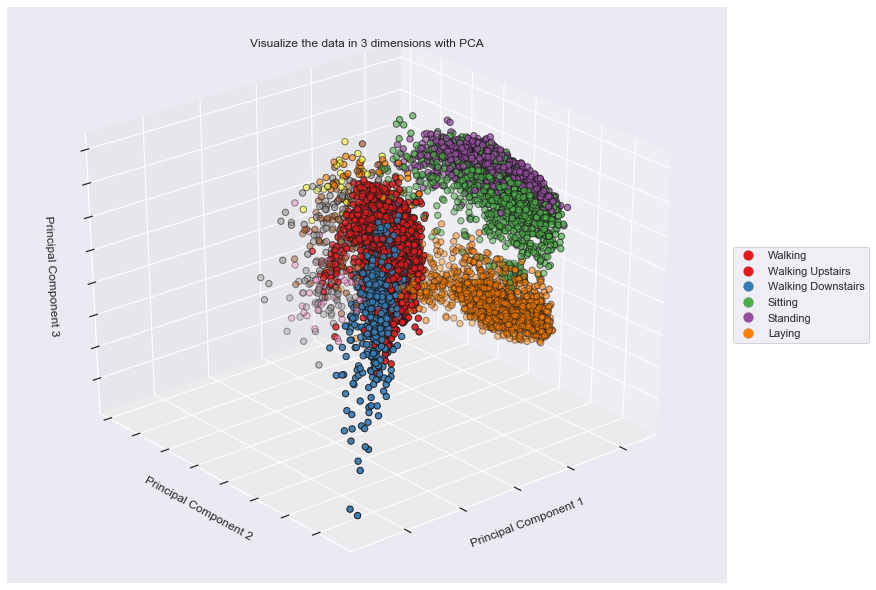

In [33]:
# A visual exploration of the data in 3 dimensions by principal components.

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_train2)
y = y_train2['Y']

labels = [('Walking', 1), ('Walking Upstairs', 2), ('Walking Downstairs', 3), 
          ('Sitting', 4), ('Standing', 5), ('Laying', 6)]

fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=130)
sc= ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=y, cmap='Set1', edgecolor='k', s=40)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# create the events marking the x data points
colors = [sc.cmap(sc.norm(i)) for i in [1,2,3,4,5,6]]
custom_lines = [plt.Line2D([],[], ls="", marker='.', 
                mec='k', mfc=c, mew=.1, ms=20) for c in colors]
ax.legend(custom_lines, [l[0] for l in labels], 
          loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('Visualize the data in 3 dimensions with PCA')

plt.show()

Modeling (Logistic Regression with Scikit-learn)

Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.
The version of Logistic Regression in Scikit-learn, supports regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

ref: https://github.com/anandprabhakar0507/Python-logistic-regression/blob/master/ML0101EN-Clas-Logistic-Reg-churn-py-v1.ipynb

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train2)
X_test = sc.fit_transform(X_test2)
    
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

# Best results obtained with 'lbfgs' solver
classifier = LogisticRegression(random_state = 0, solver= 'lbfgs')

start = time.time()
classifier.fit(X_train2, y_train2)
end = time.time()
total_training_time = end - start
print ("Done!\nTraining time (secs): {:.3f}".format(total_training_time))

# Predicting the Test set results
y_pred = classifier.predict(X_test2)


Done!
Training time (secs): 8.849


The next table shows the confusion matrix for our problem. In the confusion matrix, the rows represent the real classes 
and the columns the predicted classes for the testing data.

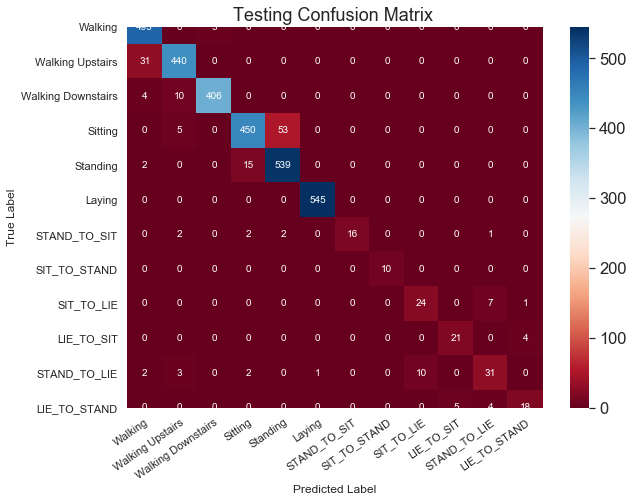


Confusion matrix (normalized to % of total test data):
[[15.591398    0.          0.09487666  0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.9803922  13.915244    0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.12650222  0.31625554 12.839974    0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.15812777  0.         14.231499    1.6761544   0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.06325111  0.          0.          0.4743833  17.046173    0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         17.235928
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.06325111  0.          0.06325111  0.06325111  0.
   0.50600886  0.         

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

# confusion matrix usage to evaluate the quality of the output of a classifier on the data set.
# https://github.com/todddangerfarr/mlnd-p5-capstone-wearables-activity-tracking/blob/master/human-activities-and-postural-transitions.ipyn
cm = confusion_matrix(y_test2, y_pred)

# Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']

colormap = plt.cm.RdBu
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()
sns.set(style='whitegrid', font_scale=1.5)
sns.heatmap(cm, 
            #fmt='.0f',
            fmt ='g',
            annot=True, 
            annot_kws={"size": 10},
            cmap=colormap,
            square=True,
            linecolor='white',
            xticklabels =Labels,
            yticklabels =Labels,
            ax = ax)

ax.set_title('Testing Confusion Matrix ')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

normalized_confusion_matrix = np.array(cm, dtype=np.float32)/np.sum(cm)*100
print("")
print("Confusion matrix (normalized to % of total test data):")
print(normalized_confusion_matrix)

# print classification report of Precision-Recall, f1-score accuracy scores
# The classification_report function builds a text report showing the main classification metrics.
#  precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive sample
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test2, y_pred, target_names=Labels))


In [37]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
# multilabel_confusion_matrix(y_test2, y_pred, labels=[1,2,3,4,5,6, 7, 8, 9, 10, 11, 12])

In [ ]:
# “The Matthews correlation coefficient is used in machine learning as a measure of the quality of 
# binary (two-class) classifications. It takes into account true and false positives and negatives 
# and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
from sklearn.metrics import matthews_corrcoef
print('matthews_corrcoef')
matthews_corrcoef(y_test2, y_pred)

In [ ]:

from sklearn.metrics import hamming_loss
print('hamming loss')
hamming_loss(y_test2, y_pred)

In [ ]:
from sklearn.metrics import zero_one_loss
# The zero_one_loss function computes the sum or the average of the 0-1 classification loss (L0−1) over nsamples
print('zero one loss')
zero_one_loss(y_test2, y_pred)

In [ ]:
from sklearn.metrics import log_loss
# log_loss(y_test2, y_pred, labels=[ 1,  2, 3, 4  ,5])


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import max_error
max_error(y_test2, y_pred)

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
#The sklearn.metrics module implements several loss, score, and utility functions to measure regression performance. 
#Some of those have been enhanced to handle the multioutput case: mean_squared_error, mean_absolute_error,explained_variance_score and r2_score.

In [ ]:
# The r2_score function computes the coefficient of determination, usually denoted as R².
# It represents the proportion of variance (of y) that has been explained by the independent variables in the model. 
# It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted
# by the model, through the proportion of explained variance.
# As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. 
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred)

The confusion matrix is plotted to get better insight of model performance using mlxted to refrain from extra code via scikit.

The model performance is evident from the diagonal concentration of the values


In [ ]:

from sklearn.metrics import confusion_matrix
#model.load_weights("HAR_weights.hdf5")
# pred = model.predict(X_test)
# pred = np.argmax(y_pred,axis = 1) 
# y_true = np.argmax(y_test2,axis = 1)

In [ ]:
# CM = confusion_matrix(y_test, y_pred)
# from mlxtend.plotting import plot_confusion_matrix
# fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10, 5))
# plt.show()

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_train2)

# function borrowed from course content
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components and displays the cumulative variance explained
    
    INPUT: pca - the result of instantiating PCA in sklearn
            
    OUTPUT: None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)

    ax.plot(ind, cumvals)

    ax.set_xlabel("No. Principal Components")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance')
    
scree_plot(pca)

In [88]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]

# Setting max_features=4 in the decision tree classifier used as the base classifier 
# for AdaBoost will increase the convergence rate
base = DecisionTreeClassifier(max_features=4)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train2)
X_test = sc.fit_transform(X_test2)
    
for n_trees in tree_list:
     #create model
    classifier = AdaBoostClassifier(base_estimator=base, n_estimators=n_trees, 
                             learning_rate=0.1, random_state=42)

    start = time.time()
    classifier.fit(X_train2, y_train2)
    end = time.time()
    total_training_time = end - start
print ("Done!\nTraining time (secs): {:.3f}".format(total_training_time))

# Predicting the Test set results
y_pred = classifier.predict(X_test2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
print(classification_report(y_test2, y_pred, target_names=Labels))


Done!
Training time (secs): 0.074
                    precision    recall  f1-score   support

           Walking       0.71      0.86      0.78       496
  Walking Upstairs       0.71      0.69      0.70       471
Walking Downstairs       0.78      0.62      0.69       420
           Sitting       0.58      0.55      0.56       508
          Standing       0.68      0.73      0.70       556
            Laying       0.81      0.78      0.80       545
      STAND_TO_SIT       0.23      0.22      0.22        23
      SIT_TO_STAND       0.11      0.10      0.11        10
        SIT_TO_LIE       0.36      0.41      0.38        32
        LIE_TO_SIT       0.52      0.52      0.52        25
      STAND_TO_LIE       0.31      0.33      0.32        49
      LIE_TO_STAND       0.54      0.48      0.51        27

          accuracy                           0.69      3162
         macro avg       0.53      0.52      0.52      3162
      weighted avg       0.69      0.69      0.69      3162



In [89]:

#http://localhost:8888/notebooks/Jupyter%20Notebooks/Ensemble%20Learning%20with%20Sklearn-plot.ipynb
import scikitplot as skplt
from sklearn.metrics import *
y_probas = classifier.predict_proba(X_test2)
skplt.metrics.plot_roc(y_test2, y_probas, figsize=(10, 8))   # Plot ROC Curve
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

Model Build
The objective is to build a classifier that can classify the different activity types, even when extended to new data (i.e.: new participants). Accuracy will therefore be used as the evaluation metric.

In [ ]:

# fit a KNN to the data 
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2.values.ravel())

train_pred = knn.predict(X_train2)
y_pred = knn.predict(X_test2)

print('Accuracy score TRAIN: ', format(accuracy_score(y_train2, train_pred)))
print('Accuracy score TEST: ', format(accuracy_score(y_test2, y_pred)))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

# confusion matrix usage to evaluate the quality of the output of a classifier on the data set.
# https://github.com/todddangerfarr/mlnd-p5-capstone-wearables-activity-tracking/blob/master/human-activities-and-postural-transitions.ipyn
cm = confusion_matrix(y_test2, y_pred)

# Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']

colormap = plt.cm.RdBu
fig = plt.figure(figsize=(10, 7))
ax = plt.axes()
sns.set(style='whitegrid', font_scale=1.5)
sns.heatmap(cm, 
            #fmt='.0f',
            fmt ='g',
            annot=True, 
            annot_kws={"size": 10},
            cmap=colormap,
            square=True,
            linecolor='white',
            xticklabels =Labels,
            yticklabels =Labels,
            ax = ax)

ax.set_title('Testing Confusion Matrix ')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=35, ha="right", rotation_mode="anchor")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

normalized_confusion_matrix = np.array(cm, dtype=np.float32)/np.sum(cm)*100
print("")
print("Confusion matrix (normalized to % of total test data):")
print(normalized_confusion_matrix)

# print classification report of Precision-Recall, f1-score accuracy scores
# The classification_report function builds a text report showing the main classification metrics.
#  precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive sample
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test2, y_pred, target_names=Labels))


In [ ]:
# “The Matthews correlation coefficient is used in machine learning as a measure of the quality of 
# binary (two-class) classifications. It takes into account true and false positives and negatives 
# and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
from sklearn.metrics import matthews_corrcoef
print('matthews_corrcoef')
matthews_corrcoef(y_test2, y_pred)

fit random forest to the data

In [101]:
# ref: https://github.com/bcheung888/udacity-capstone/blob/master/Human%20Activity%20Recognition.ipynb

from sklearn.ensemble import RandomForestClassifier
# fit random forest to the data
# set n_estimators to 100. 10 is a bit low, and its been indicated it will change to this in a future version
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train2, y_train2.values.ravel())

train_pred = rf.predict(X_train2)
rfy_pred = rf.predict(X_test2)

print('Accuracy score TRAIN: ', format(accuracy_score(y_train2, train_pred)))
print('Accuracy score TEST: ', format(accuracy_score(y_test2, rfy_pred)))

Accuracy score TRAIN:  1.0
Accuracy score TEST:  0.9114484503478811


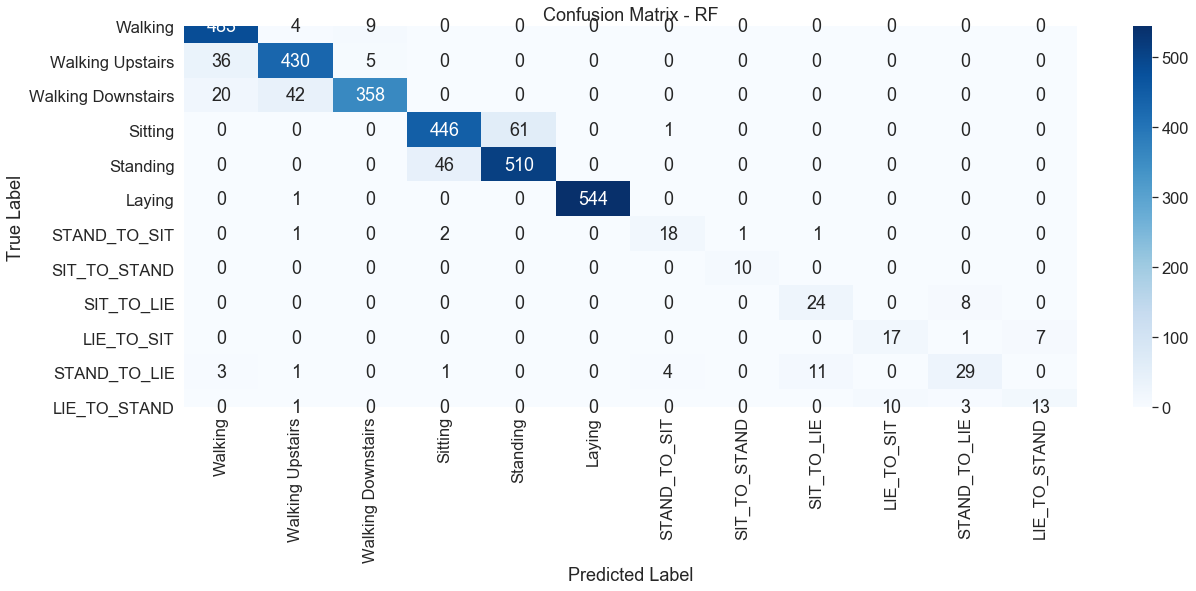

                    precision    recall  f1-score   support

           Walking       0.89      0.97      0.93       496
  Walking Upstairs       0.90      0.91      0.90       471
Walking Downstairs       0.96      0.85      0.90       420
           Sitting       0.90      0.88      0.89       508
          Standing       0.89      0.92      0.91       556
            Laying       1.00      1.00      1.00       545
      STAND_TO_SIT       0.78      0.78      0.78        23
      SIT_TO_STAND       0.91      1.00      0.95        10
        SIT_TO_LIE       0.67      0.75      0.71        32
        LIE_TO_SIT       0.63      0.68      0.65        25
      STAND_TO_LIE       0.71      0.59      0.64        49
      LIE_TO_STAND       0.65      0.48      0.55        27

          accuracy                           0.91      3162
         macro avg       0.82      0.82      0.82      3162
      weighted avg       0.91      0.91      0.91      3162



In [102]:
# confusion matrix for RF
cm = confusion_matrix(y_test2, rfy_pred)
# Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']

ax = plt.axes()
sns.heatmap(cm, 
            fmt='.0f', 
            annot=True, 
            cmap='Blues',
            xticklabels=Labels,
            yticklabels=Labels,
            ax = ax)

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

# print classification report of Precision-Recall, f1-score accuracy scores
# The classification_report function builds a text report showing the main classification metrics.
#  precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive sample
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test2, rfy_pred, target_names=Labels))

In [99]:
from sklearn.svm import LinearSVC, SVC
# Fit a linear SVM to the data
svc = LinearSVC(random_state=42)
svc.fit(X_train2, y_train2.values.ravel())

train_pred = svc.predict(X_train2)
SVCy_pred = svc.predict(X_test2)

print('Accuracy score TRAIN: ', format(accuracy_score(y_train2, train_pred)))
print('Accuracy score TEST: ', format(accuracy_score(y_test2, SVCy_pred)))

Accuracy score TRAIN:  0.9947212565984292
Accuracy score TEST:  0.946236559139785


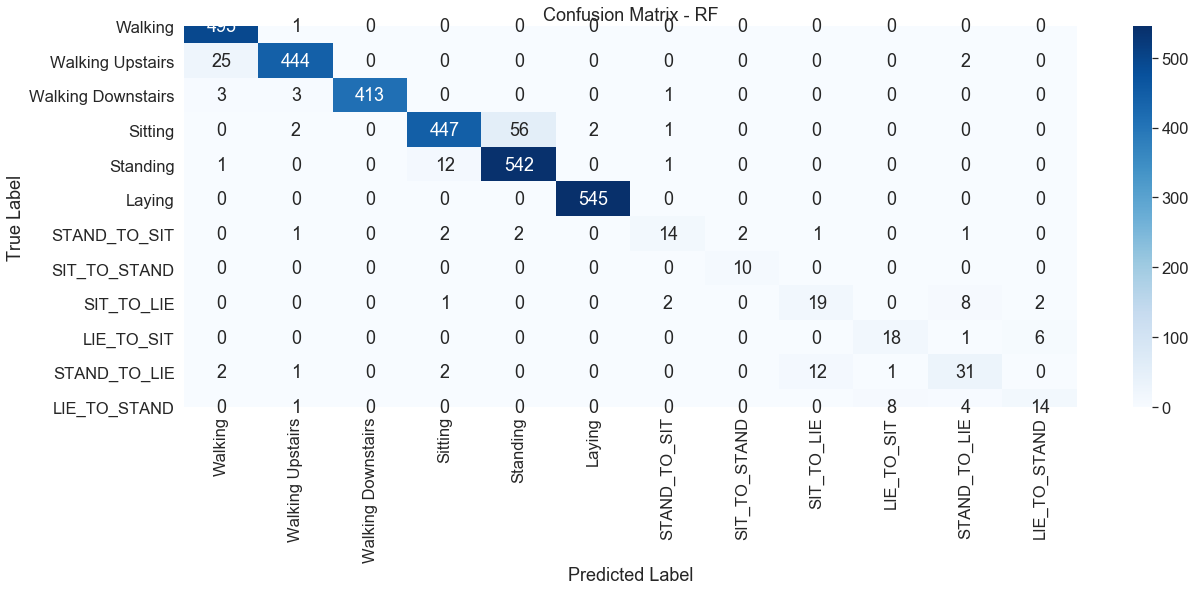

                    precision    recall  f1-score   support

           Walking       0.94      1.00      0.97       496
  Walking Upstairs       0.98      0.94      0.96       471
Walking Downstairs       1.00      0.98      0.99       420
           Sitting       0.96      0.88      0.92       508
          Standing       0.90      0.97      0.94       556
            Laying       1.00      1.00      1.00       545
      STAND_TO_SIT       0.74      0.61      0.67        23
      SIT_TO_STAND       0.83      1.00      0.91        10
        SIT_TO_LIE       0.59      0.59      0.59        32
        LIE_TO_SIT       0.67      0.72      0.69        25
      STAND_TO_LIE       0.66      0.63      0.65        49
      LIE_TO_STAND       0.64      0.52      0.57        27

          accuracy                           0.95      3162
         macro avg       0.83      0.82      0.82      3162
      weighted avg       0.95      0.95      0.95      3162



In [100]:
# confusion matrix for Linear SVM
cm = confusion_matrix(y_test2, SVCy_pred)
# Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying']
Labels = ['Walking','Walking Upstairs','Walking Downstairs','Sitting','Standing','Laying', 'STAND_TO_SIT','SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_LIE', 'LIE_TO_STAND']

ax = plt.axes()
sns.heatmap(cm, 
            fmt='.0f', 
            annot=True, 
            cmap='Blues',
            xticklabels=Labels,
            yticklabels=Labels,
            ax = ax)

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

# print classification report of Precision-Recall, f1-score accuracy scores
# The classification_report function builds a text report showing the main classification metrics.
#  precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive sample
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test2, SVCy_pred, target_names=Labels))

In [105]:
clf = SVC(random_state=42)

# try different kernels via gridsearch
parameters = {'kernel': ['poly', 'rbf', 'sigmoid']}

grid_obj =  GridSearchCV(clf, parameters, cv=3)
grid_fit = grid_obj.fit(X_train2, y_train2.values.ravel())

best_clf = grid_fit.best_estimator_
train_pred = best_clf.predict(X_train2)
best_pred = best_clf.predict(X_test2)

print(best_clf)
print('Accuracy score TRAIN: ', format(accuracy_score(y_train2, train_pred)))
print('Accuracy score TEST: ', format(accuracy_score(y_test2, best_pred)))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)
Accuracy score TRAIN:  0.9397450753186558
Accuracy score TEST:  0.91808981657179


 Model Summary:
Model	Accuracy
K-Nearest Neighbours	0.902
Random Forest	0.926
SVM-Linear	0.967
SVM-rbf	0.940
SVM-Linear (200 PCs)	0.965

Intuitively, model performance depends on how similarly a new (test) participant performs the activities relative 
to the participants the model was trained on. Training the model on more participants, along with a closer analysis
of sitting vs standing activitiescould go some way towards improving model performance

https://www.kaggle.com/fazilbtopal/ensemble-learning-with-sklearn-plot

In [ ]:
d = { "Index":np.arange(3162) , "Activity":y_pred }
final = pd.DataFrame(d)
final.to_csv('./data/HAPT Data Set/human_activity_predictions.csv' , index = False)
HARpredictions = pd.read_csv('./data/HAPT Data Set/human_activity_predictions.csv')
print(HARpredictions)

In [ ]:
# Introduction to Ensembling/Stacking in Python
# https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

In [ ]:
import tensorflow as tf

In [ ]:
# Let's convert this notebook to a README automatically for the GitHub project's title page:
!jupyter nbconvert --to markdown human_activity_dectector.ipynb
!mv human_activity_dectector.md NOTEBOOK.md

In [76]:
#https://repl.it/@vzhou842/An-Introduction-to-Neural-Networks
# https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: p_L_p_w1 stands for "partial L partial w1"
        p_L_p_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        p_ypred_p_w5 = h1 * deriv_sigmoid(sum_o1)
        p_ypred_p_w6 = h2 * deriv_sigmoid(sum_o1)
        p_ypred_p_b3 = deriv_sigmoid(sum_o1)

        p_ypred_p_h1 = self.w5 * deriv_sigmoid(sum_o1)
        p_ypred_p_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        p_h1_p_w1 = x[0] * deriv_sigmoid(sum_h1)
        p_h1_p_w2 = x[1] * deriv_sigmoid(sum_h1)
        p_h1_p_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        p_h2_p_w3 = x[0] * deriv_sigmoid(sum_h2)
        p_h2_p_w4 = x[1] * deriv_sigmoid(sum_h2)
        p_h2_p_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_w1
        self.w2 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_w2
        self.b1 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_b1

        # Neuron h2
        self.w3 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_w3
        self.w4 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_w4
        self.b2 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_b2

        # Neuron o1
        self.w5 -= learn_rate * p_L_p_ypred * p_ypred_p_w5
        self.w6 -= learn_rate * p_L_p_ypred * p_ypred_p_w6
        self.b3 -= learn_rate * p_L_p_ypred * p_ypred_p_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M


Epoch 0 loss: 0.242
Epoch 10 loss: 0.155
Epoch 20 loss: 0.105
Epoch 30 loss: 0.076
Epoch 40 loss: 0.058
Epoch 50 loss: 0.046
Epoch 60 loss: 0.038
Epoch 70 loss: 0.032
Epoch 80 loss: 0.027
Epoch 90 loss: 0.024
Epoch 100 loss: 0.021
Epoch 110 loss: 0.019
Epoch 120 loss: 0.017
Epoch 130 loss: 0.015
Epoch 140 loss: 0.014
Epoch 150 loss: 0.013
Epoch 160 loss: 0.012
Epoch 170 loss: 0.011
Epoch 180 loss: 0.010
Epoch 190 loss: 0.010
Epoch 200 loss: 0.009
Epoch 210 loss: 0.009
Epoch 220 loss: 0.008
Epoch 230 loss: 0.008
Epoch 240 loss: 0.007
Epoch 250 loss: 0.007
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.006
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

In [ ]:
# https://victorzhou.com/blog/keras-neural-network-tutorial/

In [87]:
import numpy as np
 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

 

# Normalize the images.
 

# Flatten the images.
# X_train2_flat = X_train2.values.reshape((-1, 561))


# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(561)),
  Dense(64, activation='relu'),
  Dense(12, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  X_train2,
  to_categorical(dflyt.values),
  epochs=5,
  batch_size=32,
)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'